## Exploring the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/arsas-an-arabic-sentiment-corpus-of-tweets/ArSAS..txt", header = 0, delimiter = "\t")
print(df.shape)
df.head()

(19897, 7)


,#Tweet_ID,Tweet_text,Topic,Sentiment_label,Sentiment_label_confidence,Speech_act_label,Speech_act_label_confidence
0,929241870508724224,المباراة القـادمة #غانا x #مصر الجولة الأخيرة ...,Event,Positive,0.38,Assertion,0.62
1,928942264583376897,هل هذه هي سياسة خارجيه لدوله تحترم نفسها والآخ...,Entity,Negative,1.00,Expression,0.68
2,928615163250520065,وزير خارجية فرنسا عن منتدى شباب العالم: شعرت ب...,Event,Positive,0.69,Assertion,1.00
3,931614713368186880,ومع السيسي و بشار و ايران و بن زايد و والا خلي...,Event,Negative,1.00,Expression,1.00
4,929755693011427331,أهداف مباراة غانا 0 مصر 1 تصفيات كأس العالم 20...,Event,Neutral,1.00,Assertion,1.00


In [3]:
df["Sentiment_label"].value_counts()

Sentiment_label
Negative    7384
Neutral     6894
Positive    4400
Mixed       1219
Name: count, dtype: int64

In [4]:
df["Sentiment_label_confidence"].describe()

count    19897.000000
mean         0.829907
std          0.200473
min          0.260000
25%          0.670000
50%          1.000000
75%          1.000000
max          1.000000
Name: Sentiment_label_confidence, dtype: float64

<Axes: >

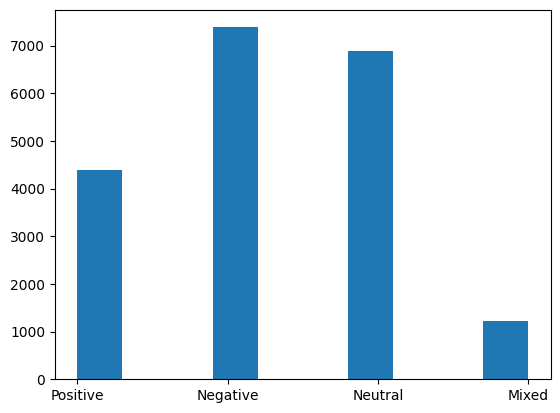

In [5]:
df["Sentiment_label"].hist(grid = False)

In [6]:
df_t=df[df["Sentiment_label_confidence"]==1.0]
df_t.shape

(10847, 7)

In [7]:
df_t["Sentiment_label"].value_counts()

Sentiment_label
Neutral     4259
Negative    4256
Positive    2197
Mixed        135
Name: count, dtype: int64

<Axes: >

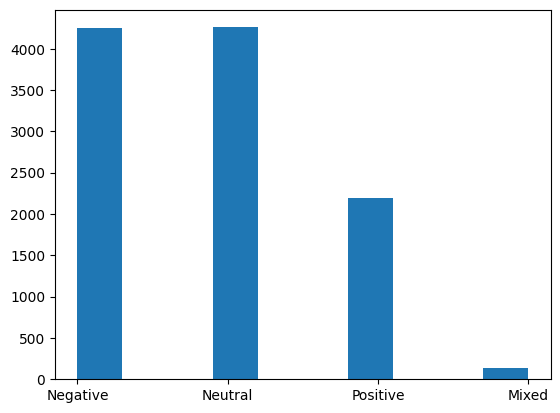

In [8]:
df_t["Sentiment_label"].hist(grid = False)

In [9]:
df_t3= df_t[df_t["Sentiment_label"]!="Mixed"]
df_t3.shape

(10712, 7)

In [10]:
df_t3["Sentiment_label"].value_counts()

Sentiment_label
Neutral     4259
Negative    4256
Positive    2197
Name: count, dtype: int64

In [11]:
df_t3=df_t3.reset_index(drop=True)

## Cleaning

In [12]:
import re
import string

In [13]:
def clean_arabic_tweet(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove hashtags sign and user mentions
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove non-Arabic characters
    #text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Normalize Arabic text
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    
    return text

In [14]:
df_t3["Tweet_text"][0]

'هل هذه هي سياسة خارجيه لدوله تحترم نفسها والآخرين :#اليمن عدوان وحصار ل 3 سنوات #البحرين قمع حراك شعبها المسالم المطالب بالمساواة والعداله #سوريا #العراق دعموا الإرهاب وارسلوا المال والسلاح والانتحاريين #قطر حصار ومحاولة فرض الوصايه والآن #لبنان محاولة فرض وصايه علني!!'

In [15]:
clean_arabic_tweet(df_t3["Tweet_text"][0])

'هل هذه هي سياسه خارجيه لدوله تحترم نفسها والاخرين اليمن عدوان وحصار ل 3 سنوات البحرين قمع حراك شعبها المسالم المطالب بالمساواه والعداله سوريا العراق دعموا الارهاب وارسلوا المال والسلاح والانتحاريين قطر حصار ومحاوله فرض الوصايه والان لبنان محاوله فرض وصايه علني'

In [16]:
df_t3["clean_text"] = df_t3["Tweet_text"].apply(clean_arabic_tweet)

## Mapping

In [17]:
label_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': 2}
df_t3['Sentiment_label'] = df_t3['Sentiment_label'].map(label_mapping)

In [18]:
df_t3.head()

,#Tweet_ID,Tweet_text,Topic,Sentiment_label,Sentiment_label_confidence,Speech_act_label,Speech_act_label_confidence,clean_text
0,928942264583376897,هل هذه هي سياسة خارجيه لدوله تحترم نفسها والآخ...,Entity,2,1.0,Expression,0.68,هل هذه هي سياسه خارجيه لدوله تحترم نفسها والاخ...
1,931614713368186880,ومع السيسي و بشار و ايران و بن زايد و والا خلي...,Event,2,1.0,Expression,1.00,ومع السيسي و بشار و ايران و بن زايد و والا خلي...
2,929755693011427331,أهداف مباراة غانا 0 مصر 1 تصفيات كأس العالم 20...,Event,0,1.0,Assertion,1.00,اهداف مباراه غانا مصر تصفيات كاس العالم روسيا ...
3,928645180873469953,#WeNeedToTalk #منتدي #شباب #العالم #شرم_الشيخ ...,Event,0,1.0,Assertion,0.64,WeNeedToTalk منتدي شباب العالم شرمالشيخ حفل ال...
4,932183451175997440,يعنى رايح تعتقل ماهيتور المصرى تانى بحجة اشترا...,Long_Standing,2,1.0,Expression,1.00,يعني رايح تعتقل ماهيتور المصري تاني بحجه اشترا...


## Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [60]:
train_df, temp_df = train_test_split(df_t3, test_size=0.2, random_state=42)  # 80% train, 20% temp
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # Split temp into 10% val and 10% test

In [46]:
print(train_df.shape, val_df.shape, test_df.shape)

(8569, 8) (1071, 8) (1072, 8)


## Re-Sampling

Run only one if them if you want to resample

In [34]:
from sklearn.utils import resample

### Upsampling

In [47]:
df_neutral = train_df[train_df["Sentiment_label"] == 0]#'Neutral']
df_positive = train_df[train_df["Sentiment_label"] == 1]#'Positive']
df_negative = train_df[train_df["Sentiment_label"] == 2]#'Negative']
#print(df_negative.shape)

# Upsample minority class
df_positive_upsampled = resample(df_positive,
                                         replace=True,  # Sample with replacement
                                         n_samples=len(df_neutral),  # To match majority class
                                         random_state=42)  # For reproducibility


# Combine majority class with upsampled minority classes
df_balanced = pd.concat([df_neutral, df_positive_upsampled, df_negative])

# Shuffle the dataset
train_df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


(3394, 8)


In [48]:
train_df.shape

(10262, 8)

## Dowensampling

In [61]:
df_neutral = train_df[train_df["Sentiment_label"] == 0]#'Neutral']
df_positive = train_df[train_df["Sentiment_label"] == 1]#'Positive']
df_negative = train_df[train_df["Sentiment_label"] == 2]#'Negative']
df_neutral = resample(df_neutral,
                    replace=False,  # Do not sample with replacement
                    n_samples=len(df_positive),  # To match minority class
                    random_state=42)
df_negative = resample(df_negative,
                    replace=False,  # Do not sample with replacement
                    n_samples=len(df_positive),  # To match minority class
                    random_state=42)

# Combine undersampled majority class with minority classes
df_balanced = pd.concat([df_positive, df_neutral, df_negative])

# Shuffle the dataset
train_df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [62]:
train_df.shape

(5223, 8)

## Modelling

In [63]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

In [22]:
model_name = "aubmindlab/bert-base-arabertv2"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
max_len=512
epochs=5
learning_rate=2e-5
batch_size=16

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [64]:
model_name = "CAMeL-Lab/bert-base-arabic-camelbert-mix"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
max_len=512
epochs=5
learning_rate=2e-5
batch_size=16

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-mix and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preparing the dataset

In [65]:
class ArabicTweetsDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, index):
        tweet = self.tweets[index]
        label = self.labels[index]
        
        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        
        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [66]:
train_dataset = ArabicTweetsDataset(
    tweets=train_df["clean_text"].to_numpy(),
    labels=train_df["Sentiment_label"].to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
)

In [67]:
val_dataset = ArabicTweetsDataset(
    tweets=val_df["clean_text"].to_numpy(),
    labels=val_df["Sentiment_label"].to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
)

In [68]:
test_dataset = ArabicTweetsDataset(
    tweets=test_df["clean_text"].to_numpy(),
    labels=test_df["Sentiment_label"].to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
)

### Creating data loaders

In [69]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

### Fine-tuning

In [70]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=16,
    #weight_decay=0.01,
    evaluation_strategy="epoch",
    learning_rate=learning_rate
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [71]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [72]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.194989
2,0.273200,0.277900
3,0.273200,0.351292
4,0.084300,0.349183
5,0.024000,0.329152


TrainOutput(global_step=1635, training_loss=0.11809316993853368, metrics={'train_runtime': 1537.0672, 'train_samples_per_second': 16.99, 'train_steps_per_second': 1.064, 'total_flos': 6871206903966720.0, 'train_loss': 0.11809316993853368, 'epoch': 5.0})

In [31]:
torch.cuda.empty_cache()

## Evaluation

In [74]:
from sklearn.metrics import classification_report
import numpy as np

def evaluate_model(trainer: Trainer, dataset: Dataset):
    predictions = trainer.predict(dataset)
    preds = np.argmax(predictions.predictions, axis=1)
    labels = predictions.label_ids
    
    # Calculate metrics
    class_report = classification_report(labels, preds, output_dict=True)
    
    metrics = {
        'accuracy': np.mean(preds == labels)
    }
    
    # Add accuracy per class
    for label, metrics_dict in class_report.items():
        if label != 'accuracy':  # Skip the overall accuracy
            metrics[f'accuracy_{label}'] = metrics_dict['f1-score']
    
    return metrics

# Usage example after training
# Assuming you have a `trainer` object and `test_dataset`:
test_metrics = evaluate_model(trainer, test_dataset)
print(f"Test metrics: {test_metrics}")

Test metrics: {'accuracy': 0.9365671641791045, 'accuracy_0': 0.9523809523809523, 'accuracy_1': 0.8967032967032966, 'accuracy_2': 0.9417596034696406, 'accuracy_macro avg': 0.9302812841846299, 'accuracy_weighted avg': 0.9368106361448202}
